In [ ]:
<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ほしいプロダクトのidを取得する" data-toc-modified-id="ほしいプロダクトのidを取得する-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ほしいプロダクトのidを取得する</a></span></li><li><span><a href="#TYの1年間の四本値を取得" data-toc-modified-id="TYの1年間の四本値を取得-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TYの1年間の四本値を取得</a></span></li><li><span><a href="#TD-sequentialの取得" data-toc-modified-id="TD-sequentialの取得-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TD sequentialの取得</a></span><ul class="toc-item"><li><span><a href="#まずは1個" data-toc-modified-id="まずは1個-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>まずは1個</a></span></li><li><span><a href="#複数" data-toc-modified-id="複数-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>複数</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [6]:
import sys
sys.path.append('/usr/local/lib/python3.8/dist-packages')

In [8]:
### Google Colab上で実行する場合は、
### tomdemark.pyからget_tdsequential, plot_tdseqを、
### investingcom_scraper.pyからget_historicalを、
### それぞれコピペ

from tomdemark import get_tdsequential, plot_tdseq
from investingcom_scraper import get_historical

In [ ]:
# ほしいプロダクトのidを取得する
`investing.com`から四本値を取得するために、`investing.com`上の`id`を指定する必要があるので、それを探す

`id`がすでにわかっている場合は、ここを飛ばすことができる

In [9]:
### Google Colab上で実行する場合は、
### investingcom_scraper.pyからsearch_id_candidatesを、
### コピペ

from investingcom_scraper import search_id_candidates

In [ ]:
`search_id_candidates('クエリ')`で、ほしいプロダクトを検索できる

In [10]:
search_id_candidates('US 10 year T Note')

{'pairId': 8880, 'name': 'US 10 Year T-Note Futures', 'flag': 'USA', 'link': '/rates-bonds/us-10-yr-t-note', 'symbol': 'TY', 'type': 'Financial Future', 'pair_type_raw': 'futurebonds', 'pair_type': 'bond', 'countryID': 5, 'sector': 0, 'region': 1, 'industry': 0, 'isCrypto': False, 'exchange': '', 'exchangeID': 1004}
{'pairId': 958107, 'name': 'CBOE/CBOT 10-year US Treasury Note Volatility', 'flag': 'USA', 'link': '/indices/10-year-us-treasury-note-volatility', 'symbol': 'TYVIX', 'type': 'Index - CBOE', 'pair_type_raw': 'indice', 'pair_type': 'indice', 'countryID': 5, 'sector': 0, 'region': 1, 'industry': 0, 'isCrypto': False, 'exchange': 'CBOE', 'exchangeID': 97}
8880 +++ TY +++ US 10 Year T-Note Futures
958107 +++ TYVIX +++ CBOE/CBOT 10-year US Treasury Note Volatility


In [ ]:
これで、TYの`id`は`8880`であることがわかる

In [ ]:
# TYの1年間の四本値を取得

In [11]:
df_ex_weekend = get_historical(
    id_=8880,
    from_date=datetime(2020, 3, 9),
    to_date=datetime(2021, 3, 9),
    force_exclude_weekend=True
)

df_in_weekend = get_historical(
    id_=8880,
    from_date=datetime(2020, 3, 9),
    to_date=datetime(2021, 3, 9),
    force_exclude_weekend=False
)

In [12]:
df_ex_weekend.tail()

,Date,Open,High,Low,Close
4,2021-03-03,134.73,134.73,133.95,134.14
3,2021-03-04,134.06,134.28,133.48,133.50
2,2021-03-05,133.44,133.63,132.88,133.45
1,2021-03-08,133.14,133.22,132.94,132.98
0,2021-03-09,132.97,133.48,132.97,133.41


In [ ]:
休日を強制排除する

In [8]:
print(len(df_ex_weekend))
print(len(df_in_weekend))

261
265


In [13]:
print('除かれた日')
set(df_in_weekend['Date']) - set(df_ex_weekend['Date'])

除かれた日


{Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-09-06 00:00:00'),
 Timestamp('2021-01-17 00:00:00'),
 Timestamp('2021-02-14 00:00:00')}

In [ ]:
# TD sequentialの取得

In [ ]:
## まずは1個

In [ ]:
name, invcom_id = 'TY', 8880

df = get_historical(
    id_=invcom_id,
    from_date=datetime(2020, 9, 9),
    to_date=datetime(2021, 3, 9),
    force_exclude_weekend=True,
    dateCol_be_str=True
)
t, o, h, l, c, shortVal, longVal, sellVal, buyVal = get_tdsequential(df)
plot_tdseq(t, o, h, l, c, shortVal, longVal, sellVal, buyVal, 
           ylabel=name, figshow=True)

In [ ]:
## 複数

In [14]:
wanted_investingcom_ids = {
    'US': 8907,
    'TY': 8880,
    'FV': 8905,
    'TU': 8906,
    'Buxl': 40739,
    'Bund': 8895,
    'Bobl': 8899,
    'Schatz': 8900,
    'OAT': 28719,
    'Gilt': 8886,
    'Spread_US02_US10': 1141794,
    'JGB_Futures': 8986,
    'S&P500_Futures': 8839,
    'Nikkei_Futures': 1097727,
    'USDJPY': 3,
    'EURUSD': 1,
    'USDCNH': 961728
    }

INFO : 2021-03-15 03:42:50,945 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:42:50,949 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:42:51,014 : 計算終了
INFO : 2021-03-15 03:42:51,015 : プロット中...
INFO : 2021-03-15 03:42:51,031 : 値動きプロット中...
INFO : 2021-03-15 03:42:51,345 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:42:51,354 : 整形中...


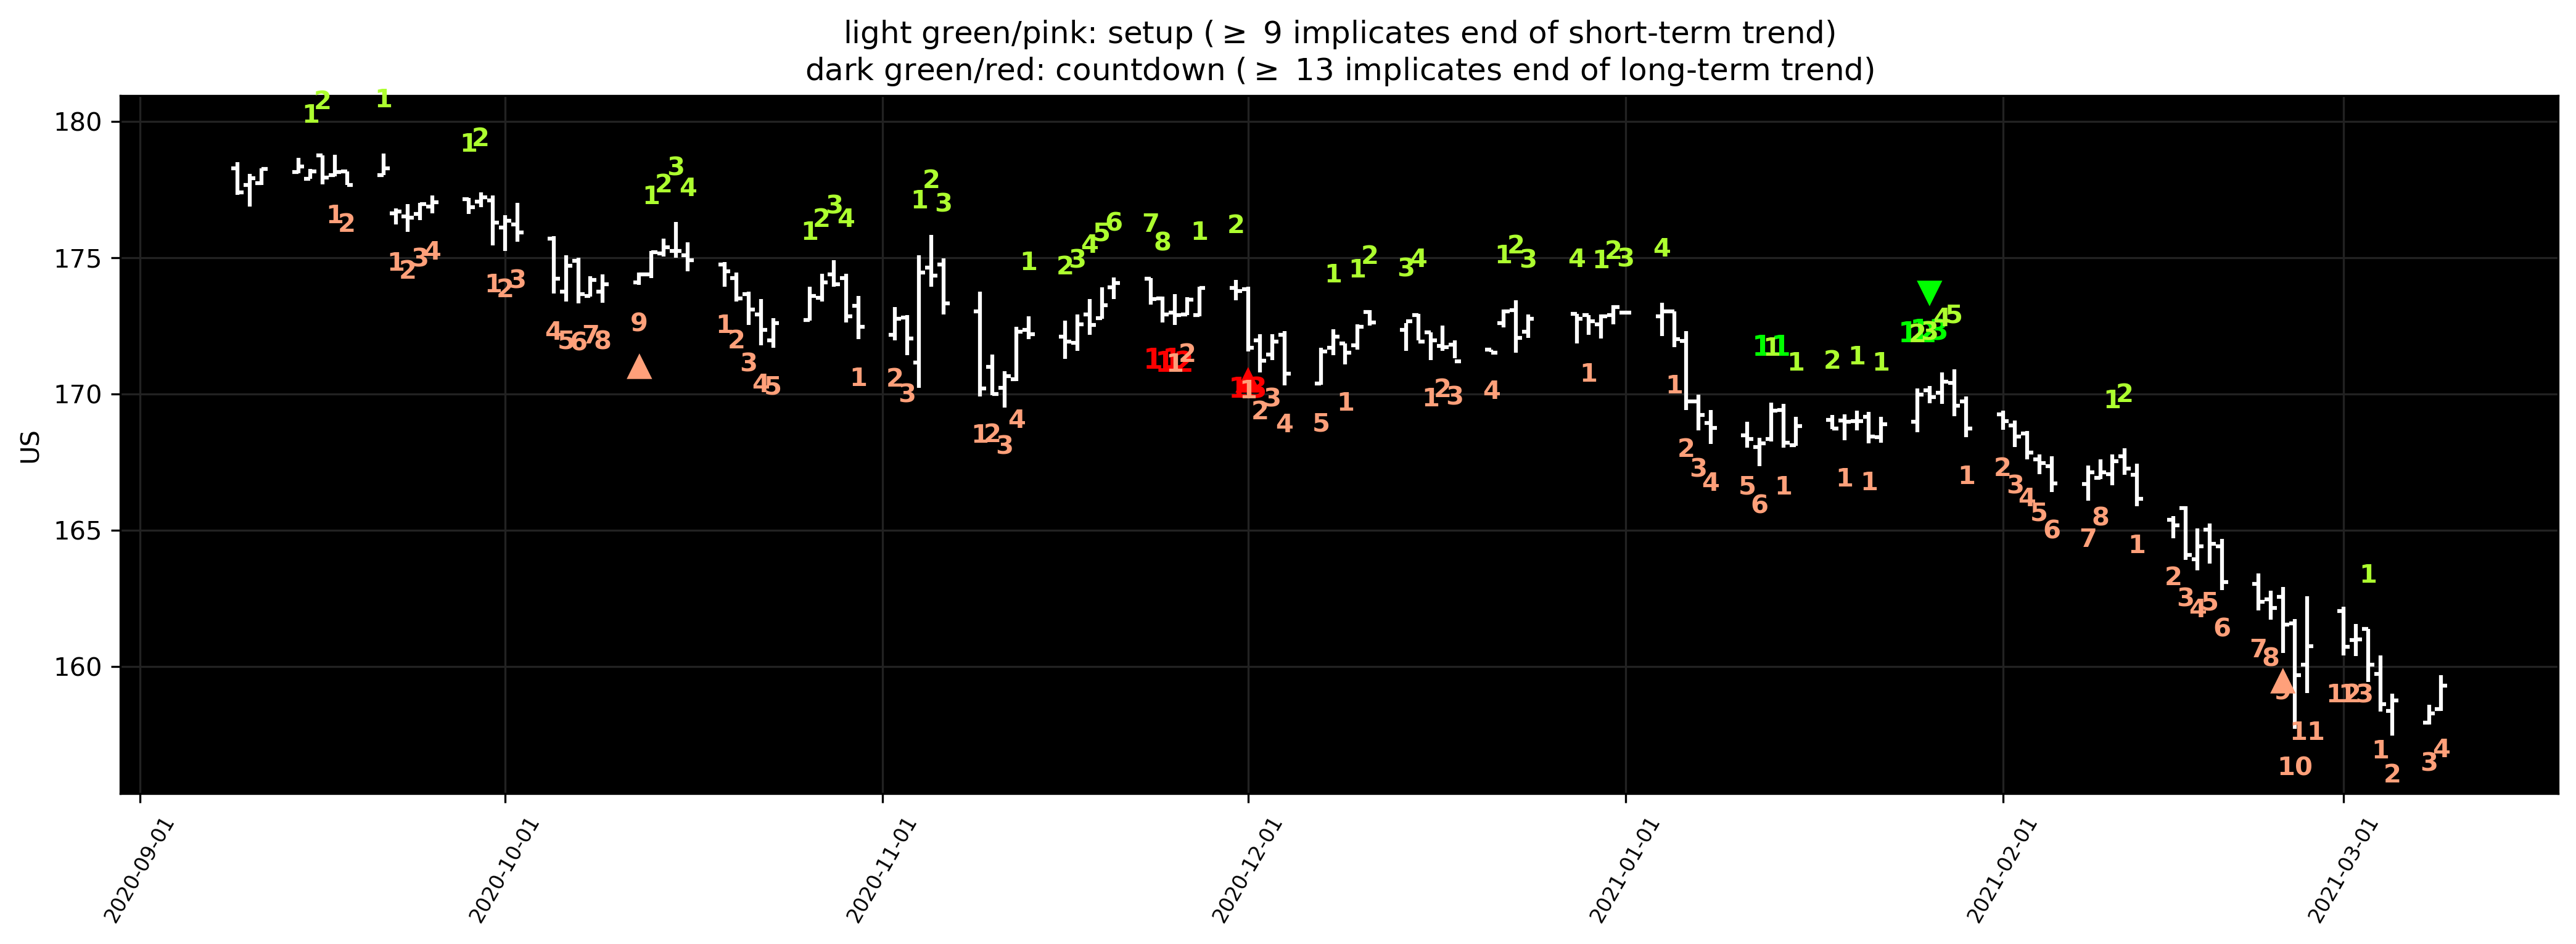

INFO : 2021-03-15 03:42:53,187 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:42:53,187 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:42:53,251 : 計算終了
INFO : 2021-03-15 03:42:53,251 : プロット中...
INFO : 2021-03-15 03:42:53,267 : 値動きプロット中...
INFO : 2021-03-15 03:42:53,575 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:42:53,584 : 整形中...


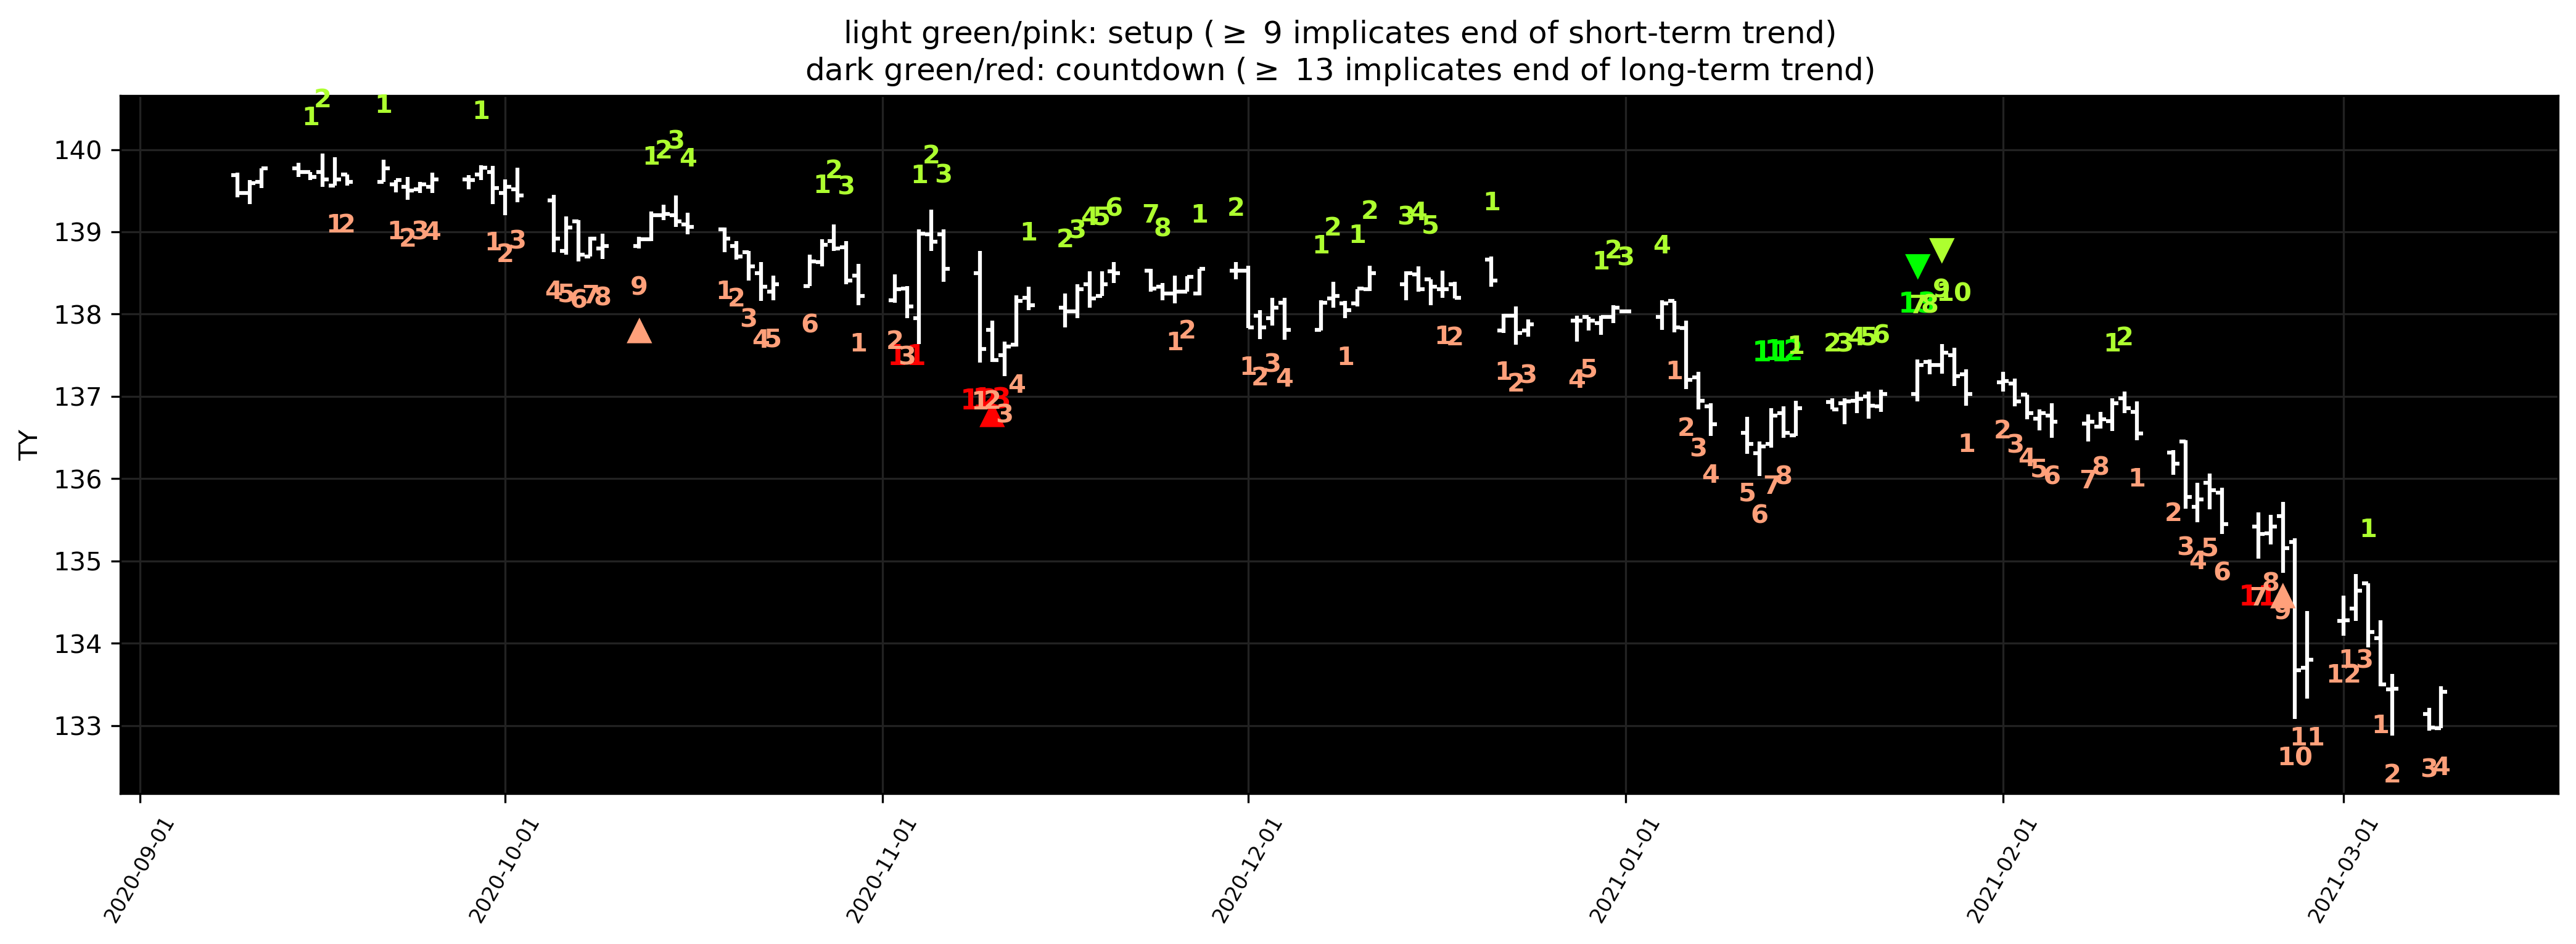

INFO : 2021-03-15 03:42:55,206 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:42:55,207 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:42:55,267 : 計算終了
INFO : 2021-03-15 03:42:55,268 : プロット中...
INFO : 2021-03-15 03:42:55,282 : 値動きプロット中...
INFO : 2021-03-15 03:42:55,698 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:42:55,706 : 整形中...


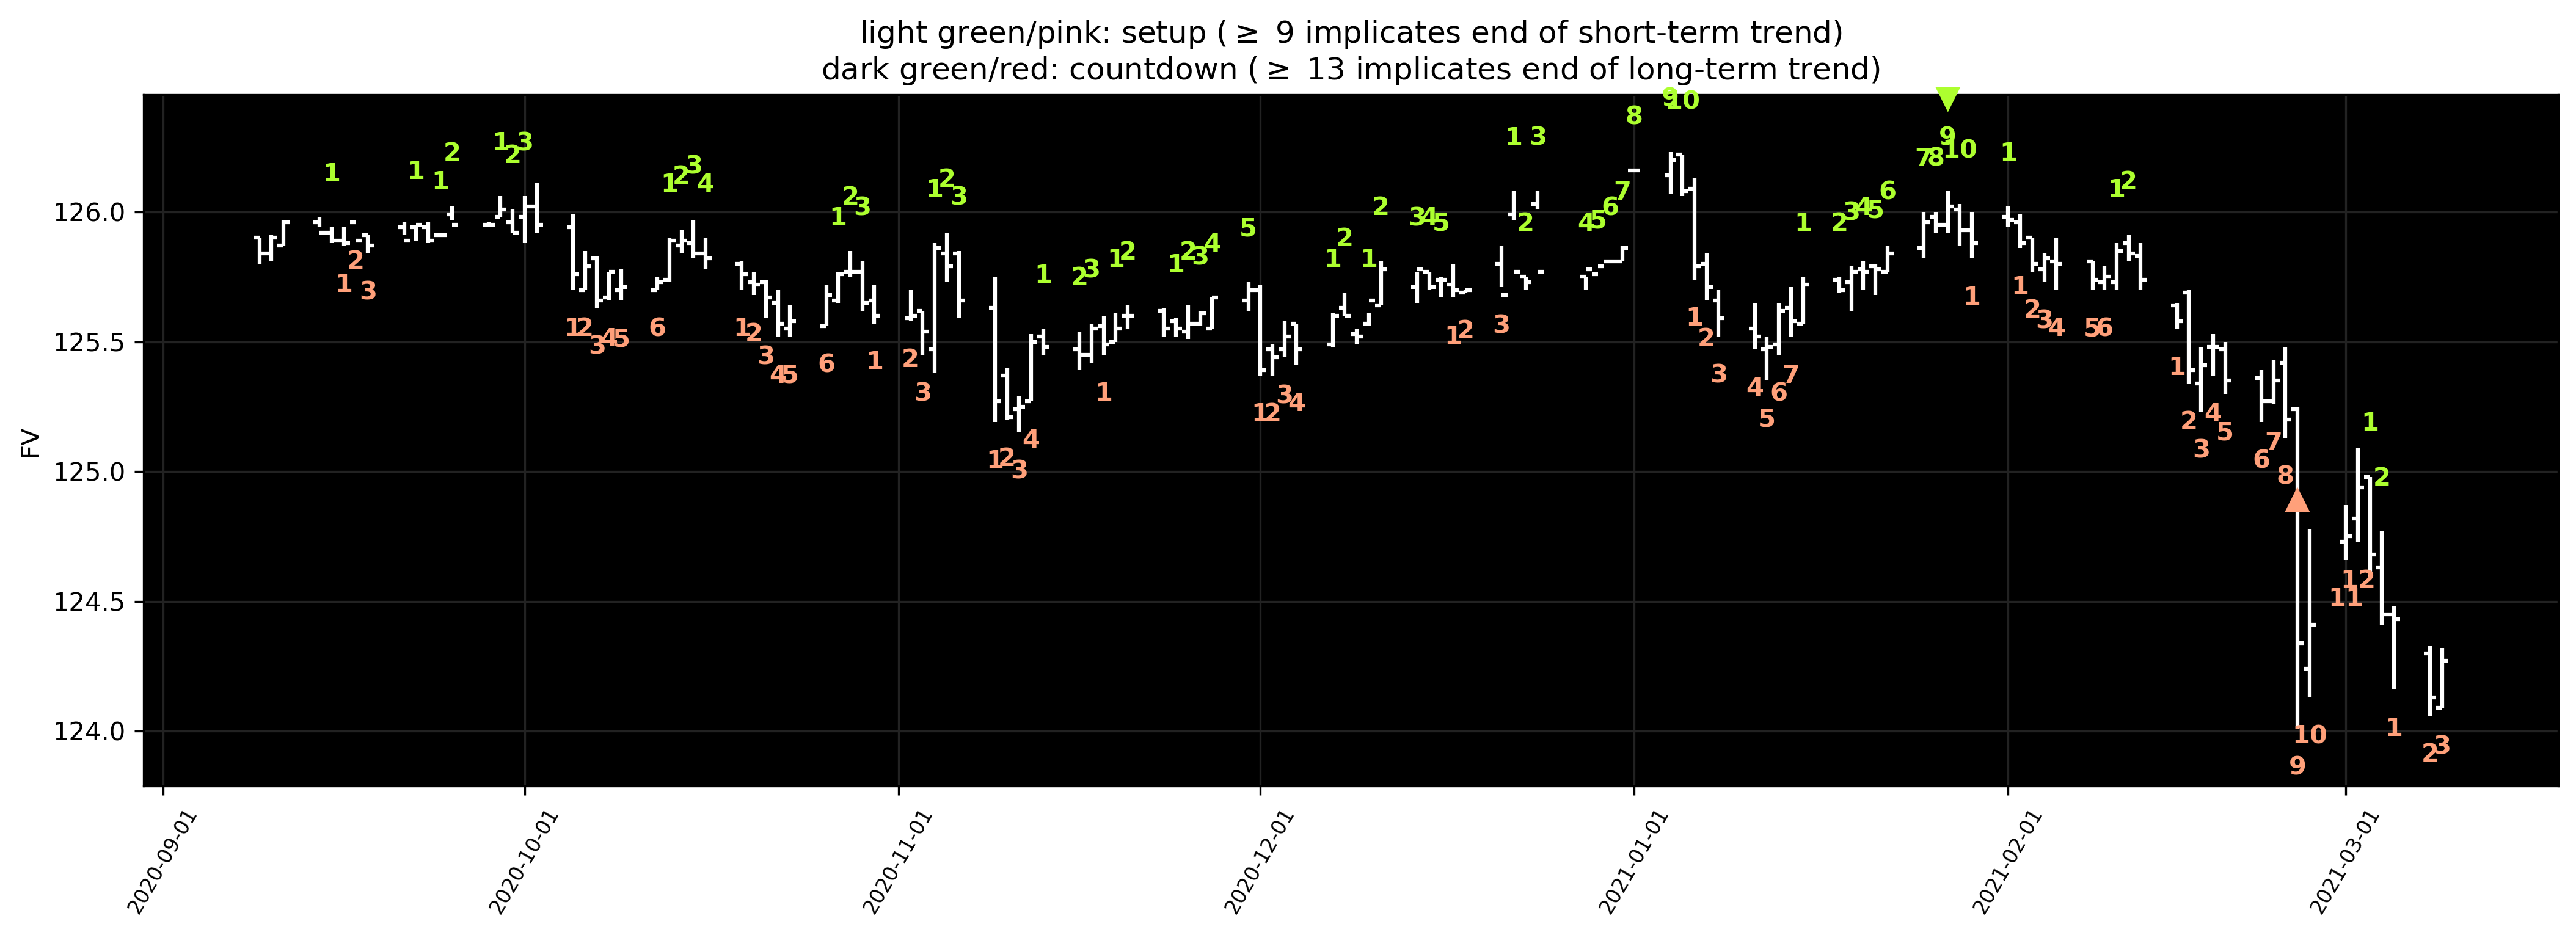

INFO : 2021-03-15 03:42:57,281 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:42:57,282 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:42:57,348 : 計算終了
INFO : 2021-03-15 03:42:57,348 : プロット中...
INFO : 2021-03-15 03:42:57,363 : 値動きプロット中...
INFO : 2021-03-15 03:42:57,672 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:42:57,679 : 整形中...


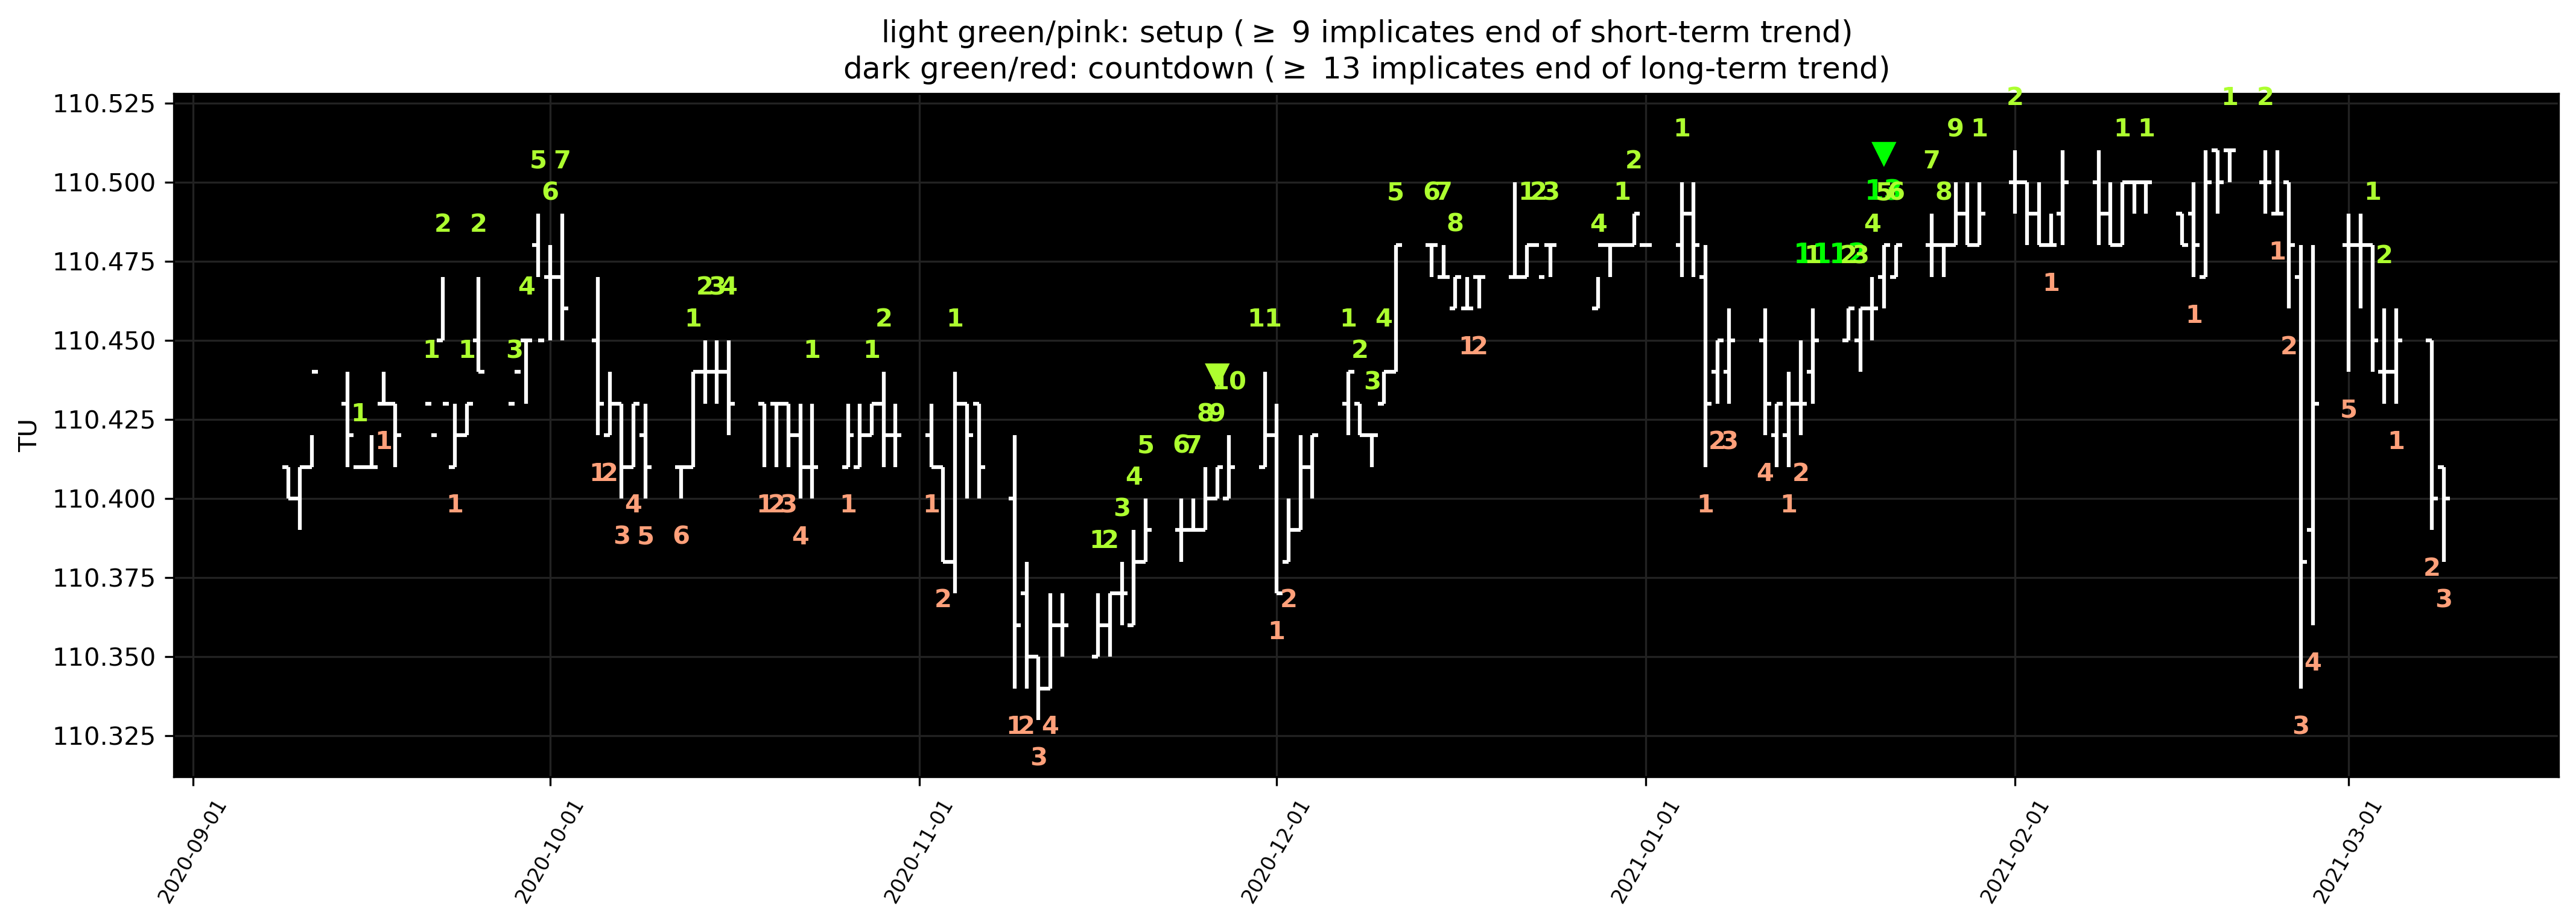

INFO : 2021-03-15 03:42:59,139 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:42:59,140 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:42:59,201 : 計算終了
INFO : 2021-03-15 03:42:59,201 : プロット中...
INFO : 2021-03-15 03:42:59,338 : 値動きプロット中...
INFO : 2021-03-15 03:42:59,623 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:42:59,632 : 整形中...


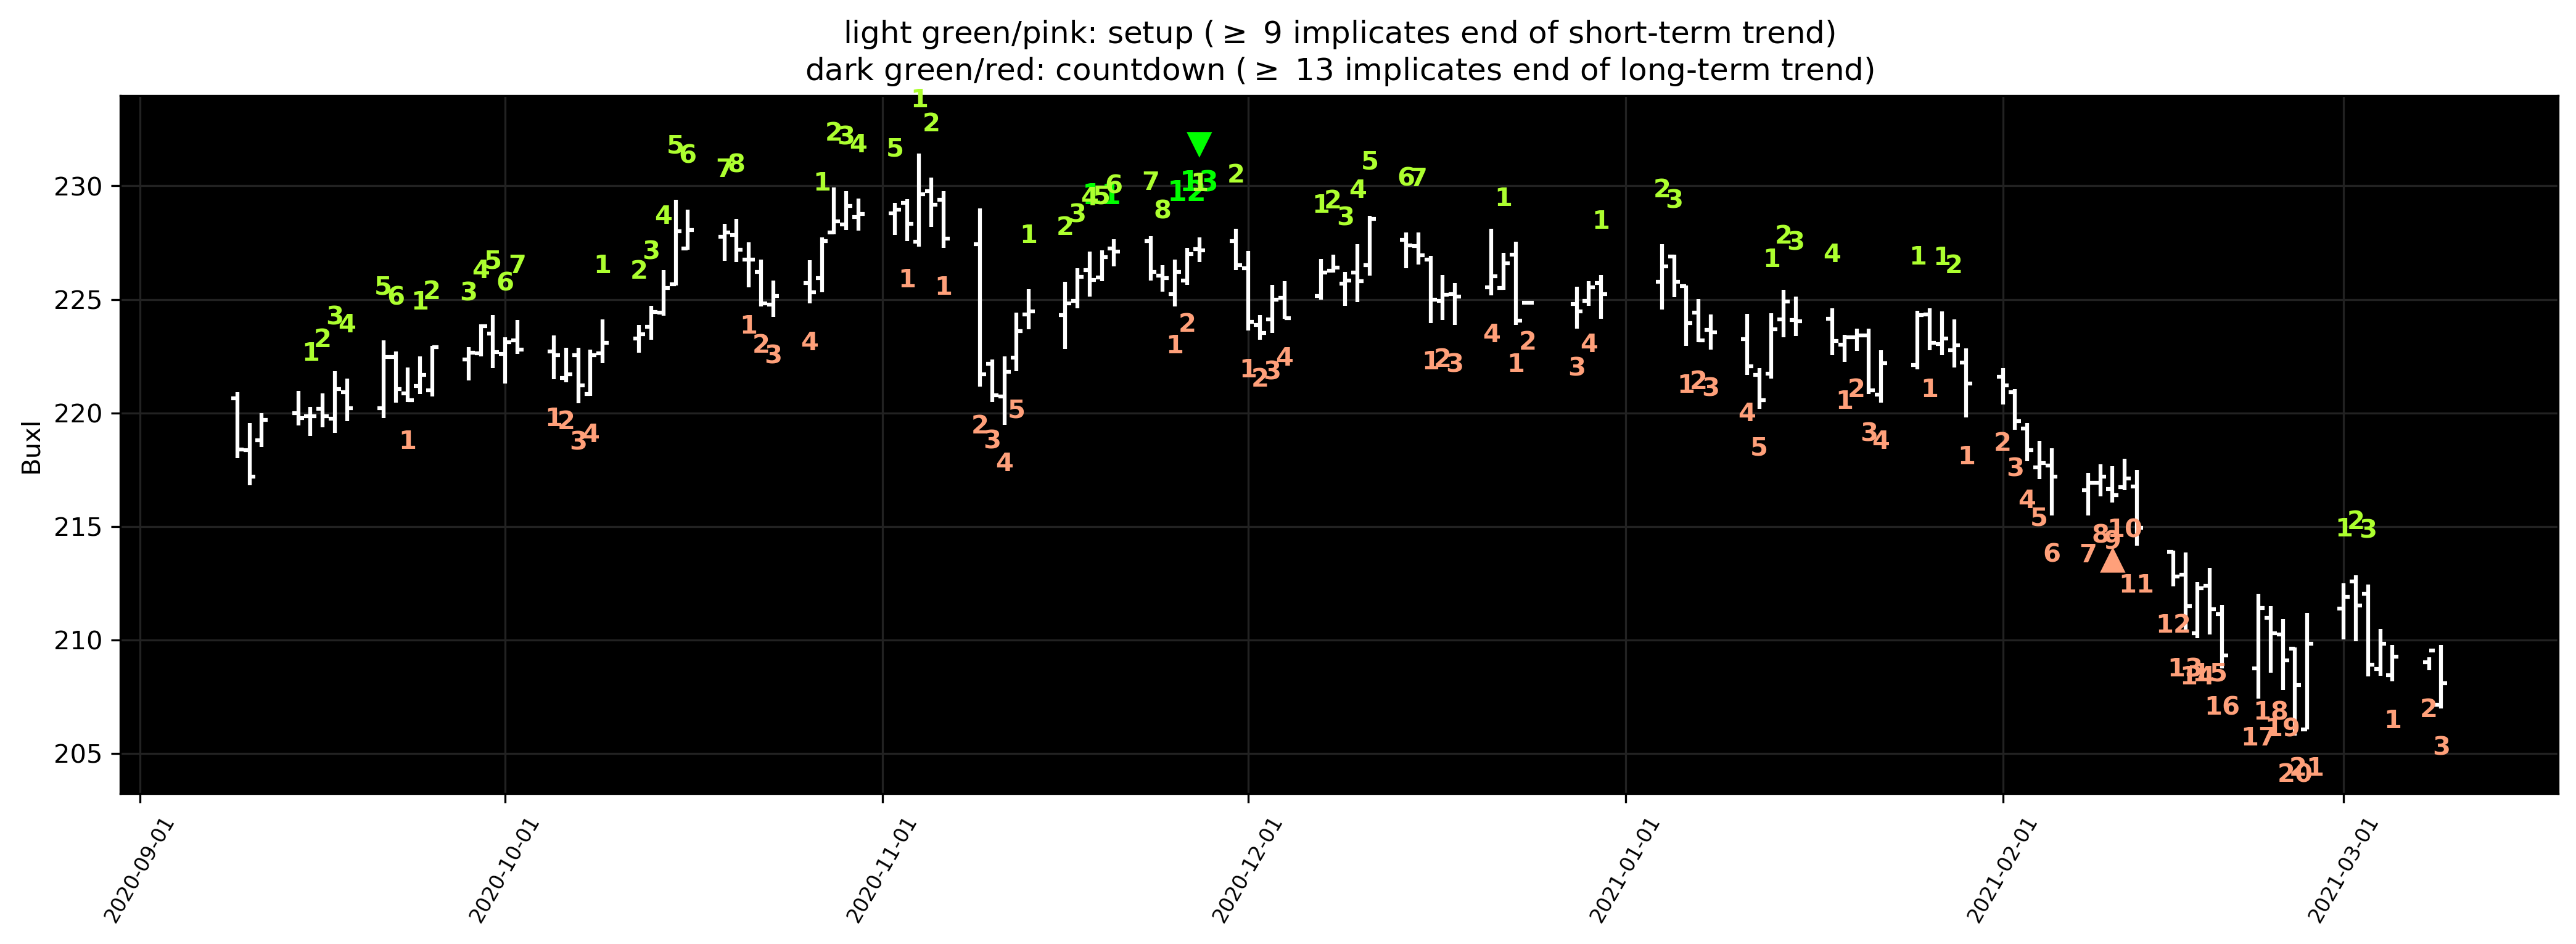

INFO : 2021-03-15 03:43:01,227 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:01,229 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:01,290 : 計算終了
INFO : 2021-03-15 03:43:01,291 : プロット中...
INFO : 2021-03-15 03:43:01,306 : 値動きプロット中...
INFO : 2021-03-15 03:43:01,599 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:01,609 : 整形中...


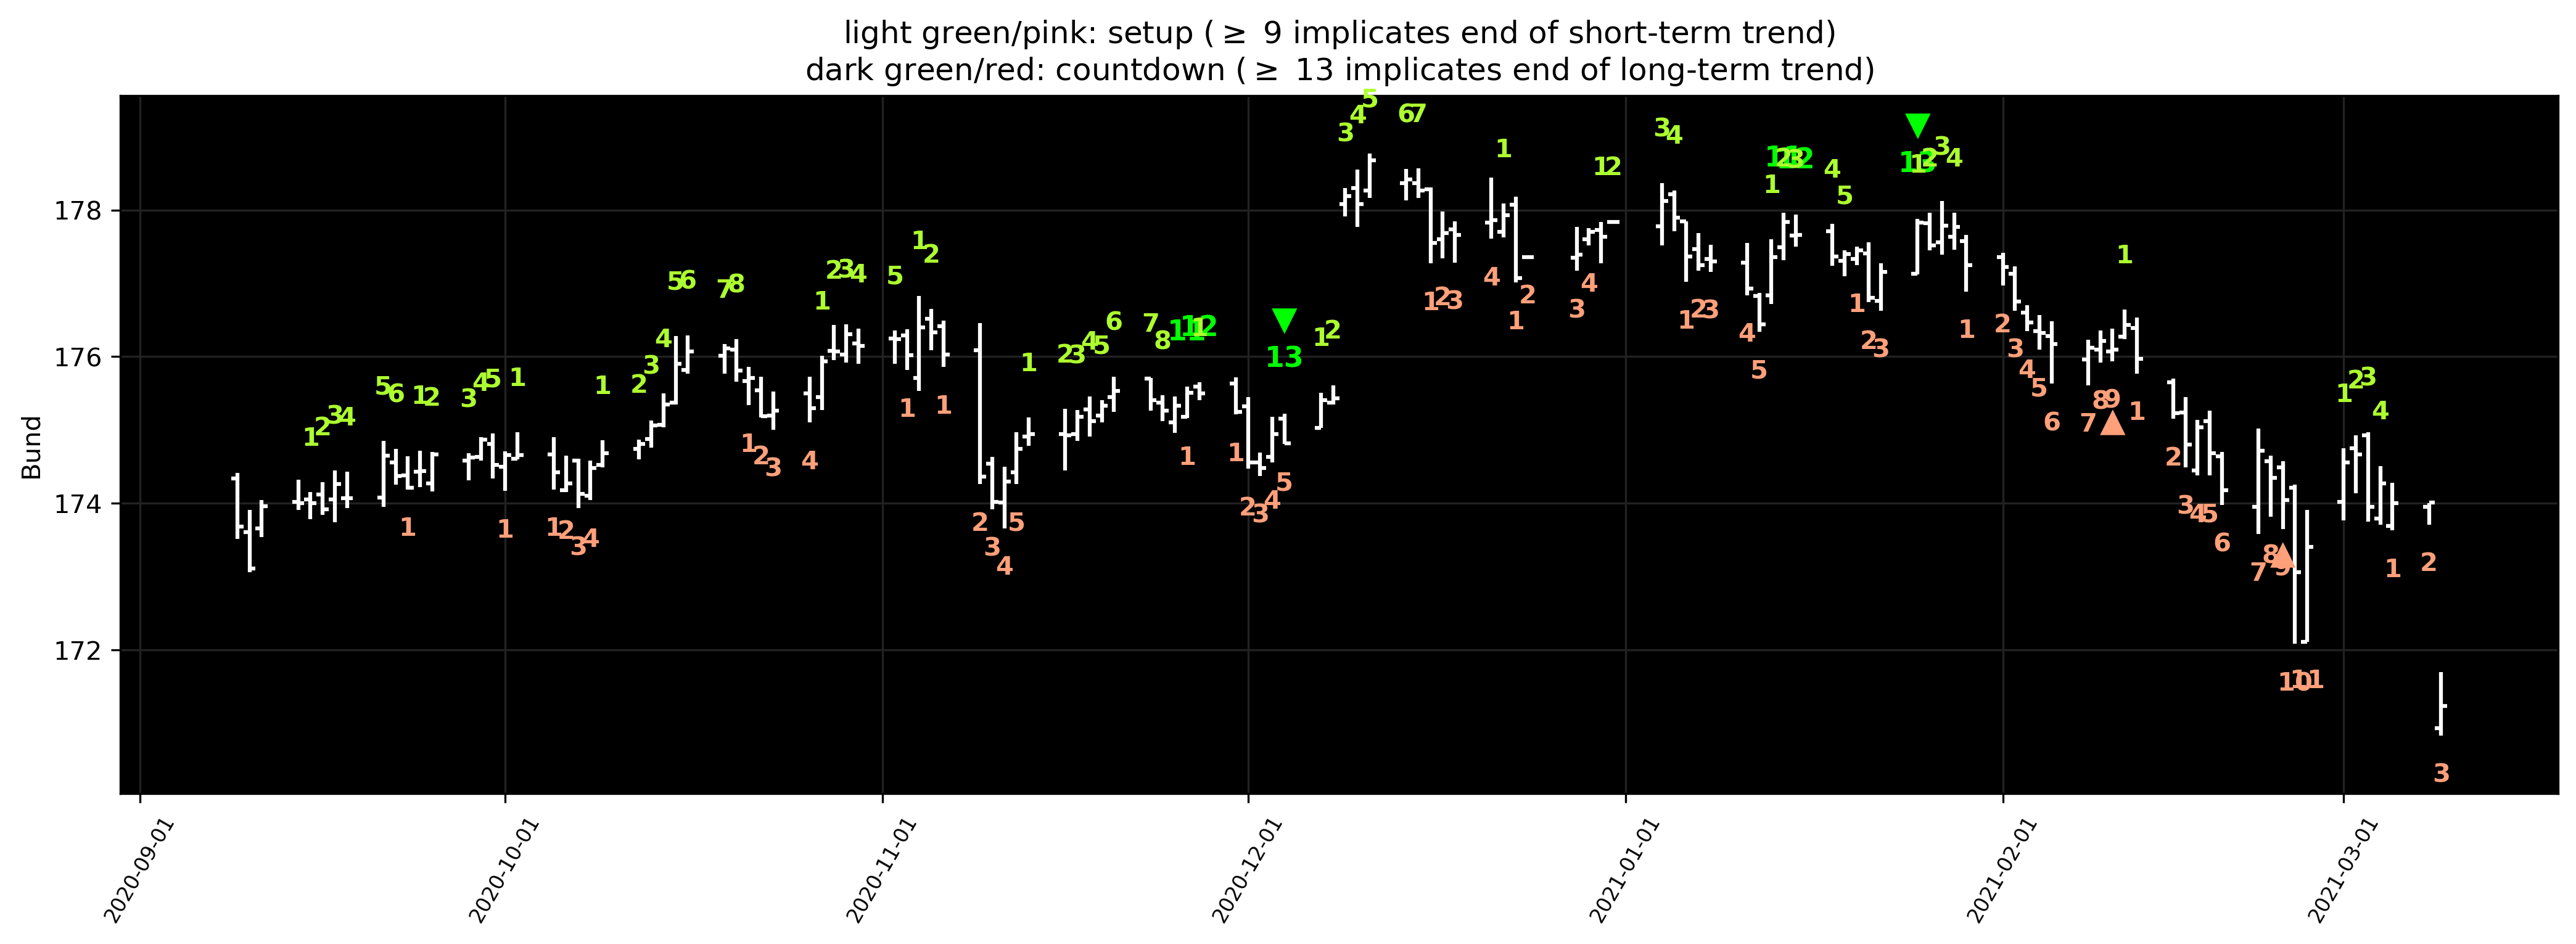

INFO : 2021-03-15 03:43:03,249 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:03,249 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:03,313 : 計算終了
INFO : 2021-03-15 03:43:03,314 : プロット中...
INFO : 2021-03-15 03:43:03,330 : 値動きプロット中...
INFO : 2021-03-15 03:43:03,618 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:03,633 : 整形中...


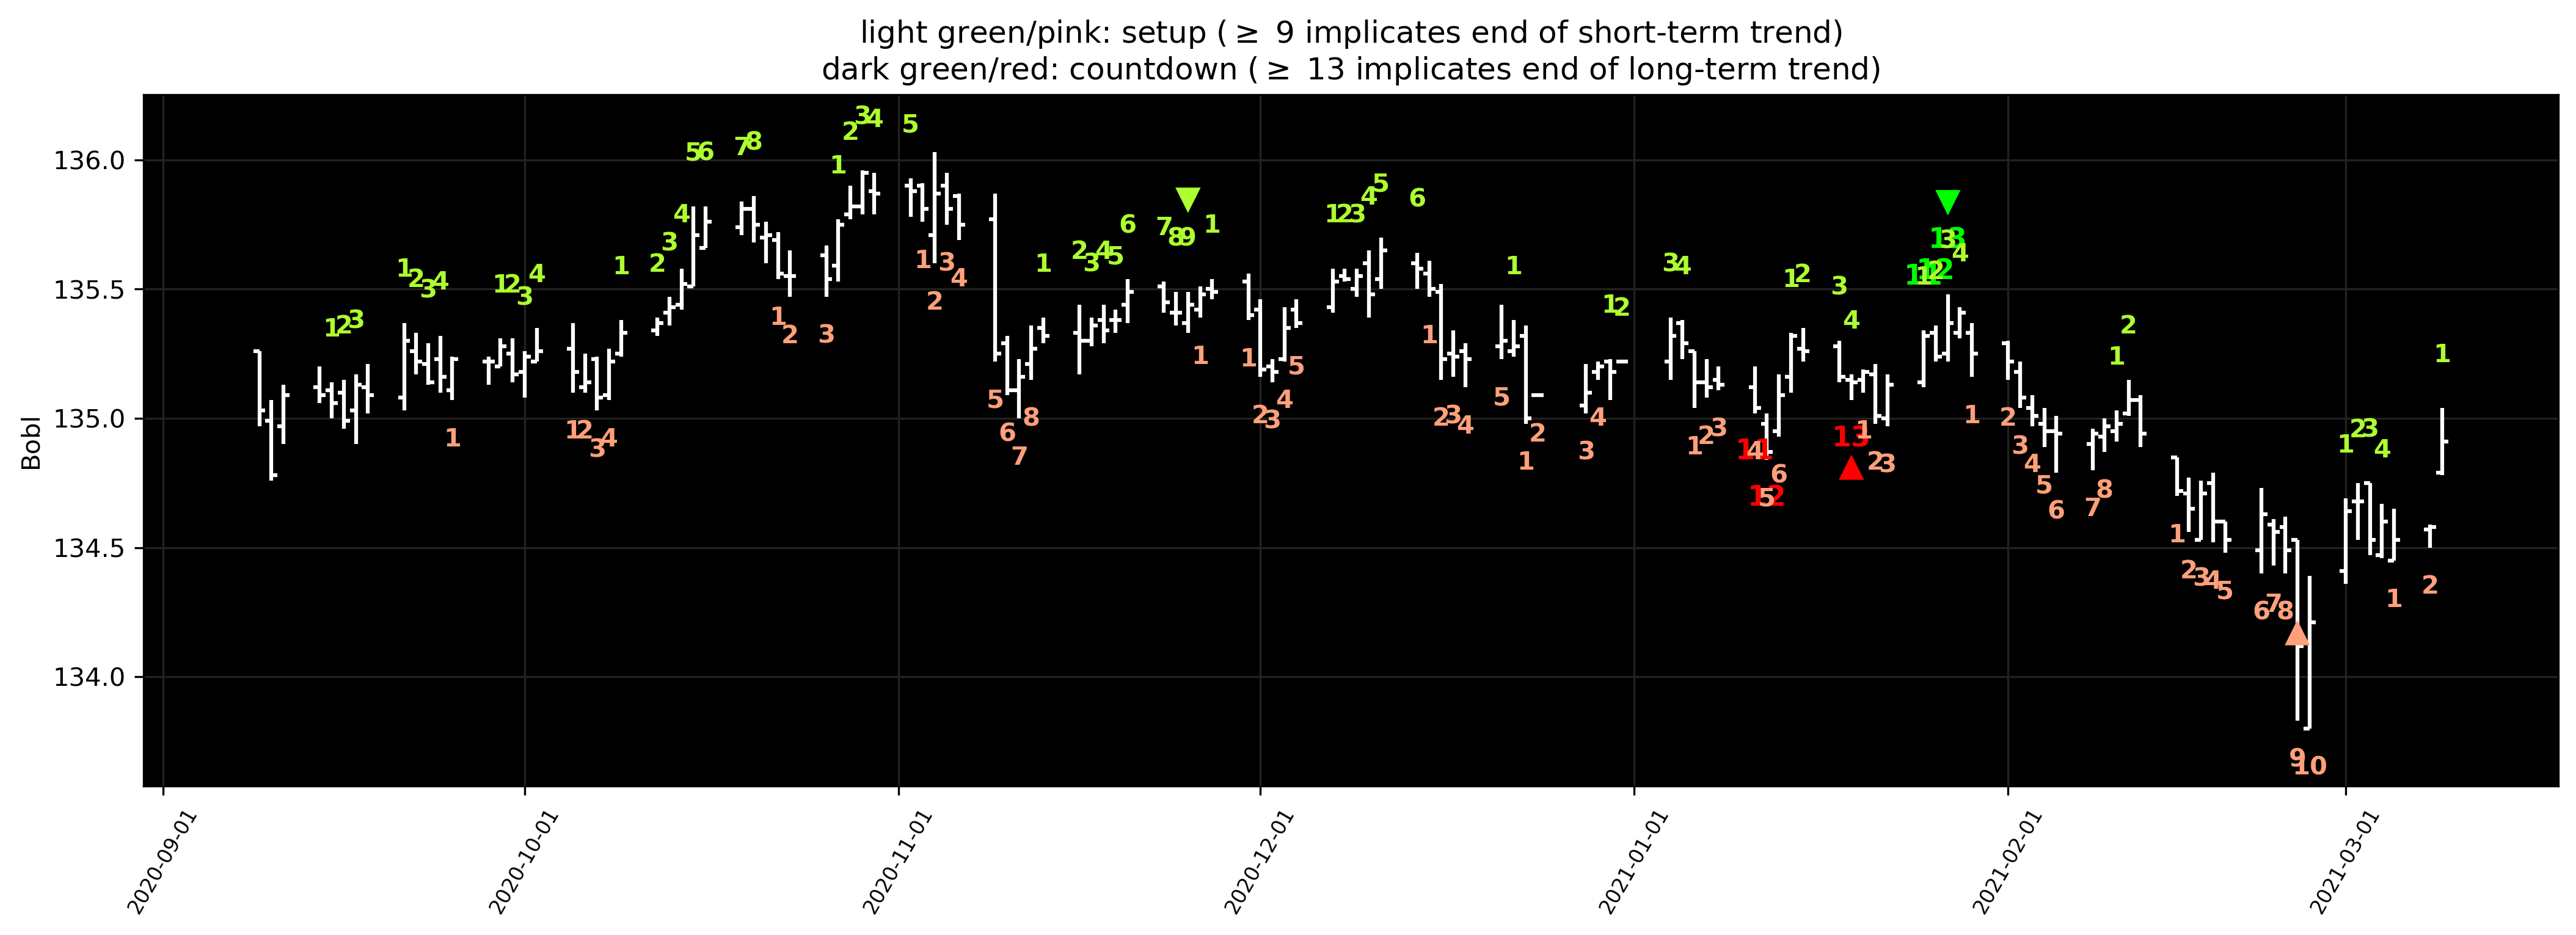

INFO : 2021-03-15 03:43:05,265 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:05,266 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:05,334 : 計算終了
INFO : 2021-03-15 03:43:05,334 : プロット中...
INFO : 2021-03-15 03:43:05,349 : 値動きプロット中...
INFO : 2021-03-15 03:43:05,791 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:05,799 : 整形中...


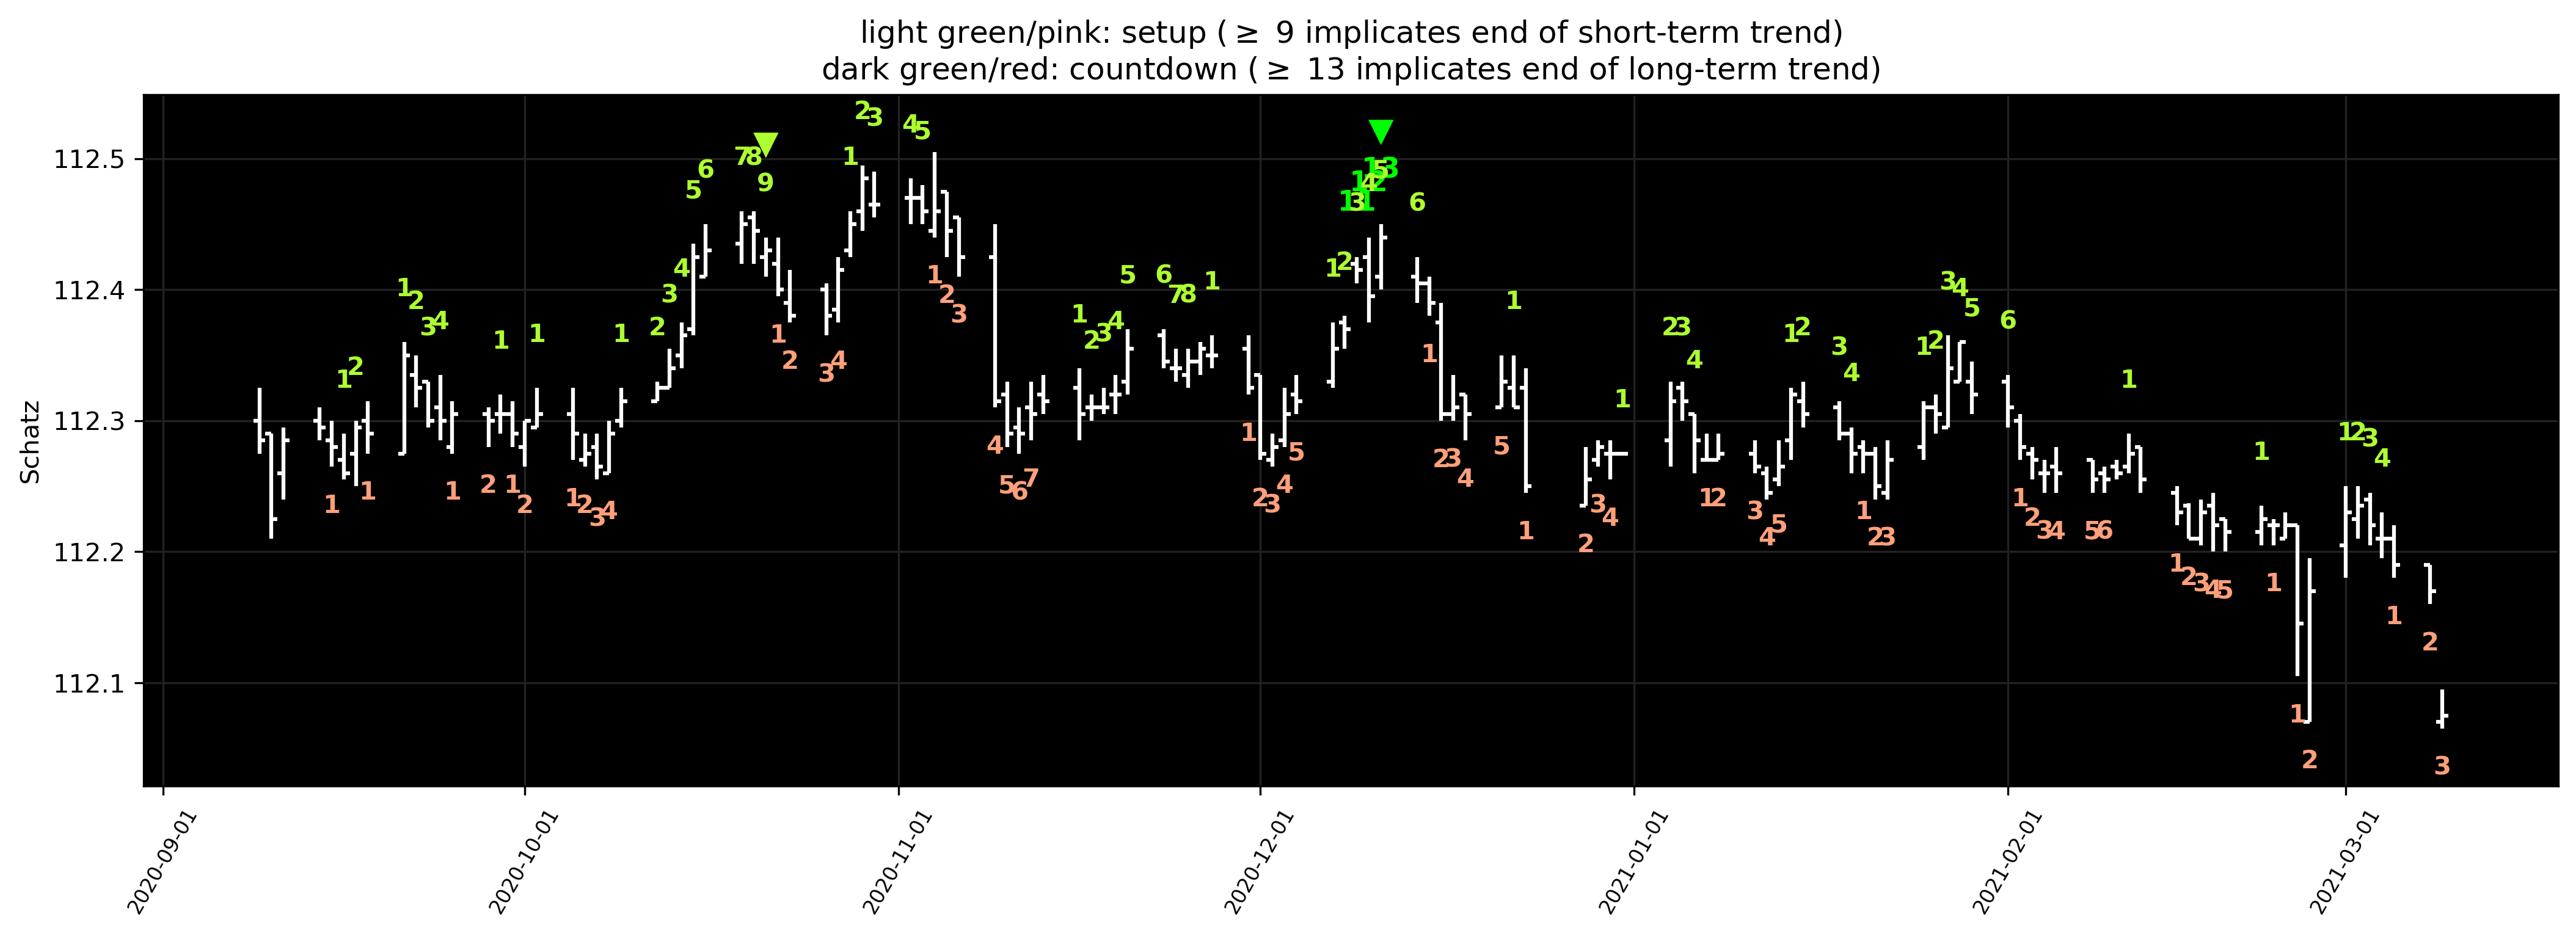

INFO : 2021-03-15 03:43:07,345 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:07,346 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:07,408 : 計算終了
INFO : 2021-03-15 03:43:07,409 : プロット中...
INFO : 2021-03-15 03:43:07,422 : 値動きプロット中...
INFO : 2021-03-15 03:43:07,714 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:07,722 : 整形中...


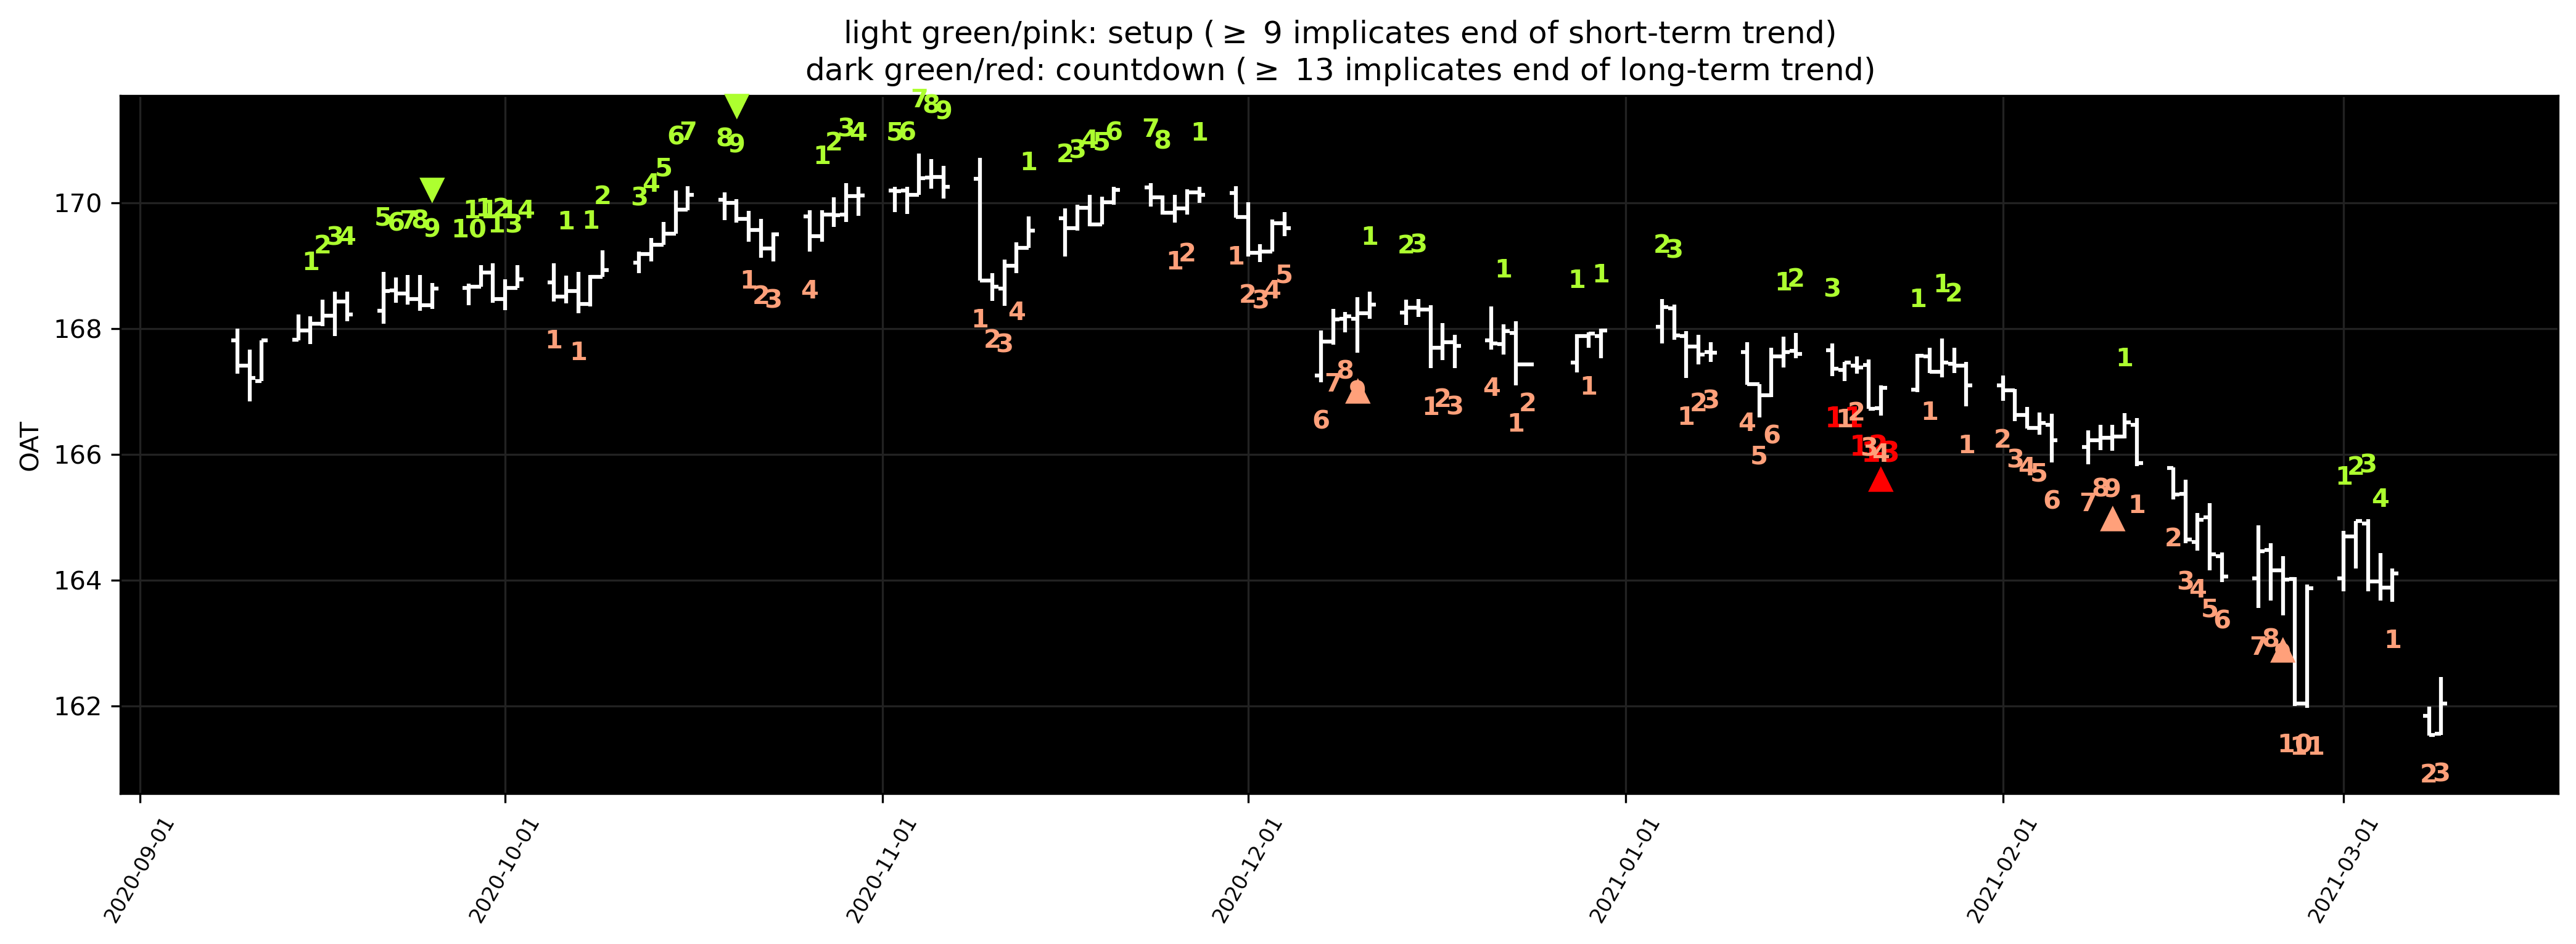

INFO : 2021-03-15 03:43:09,337 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:09,338 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:09,399 : 計算終了
INFO : 2021-03-15 03:43:09,400 : プロット中...
INFO : 2021-03-15 03:43:09,530 : 値動きプロット中...
INFO : 2021-03-15 03:43:09,823 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:09,832 : 整形中...


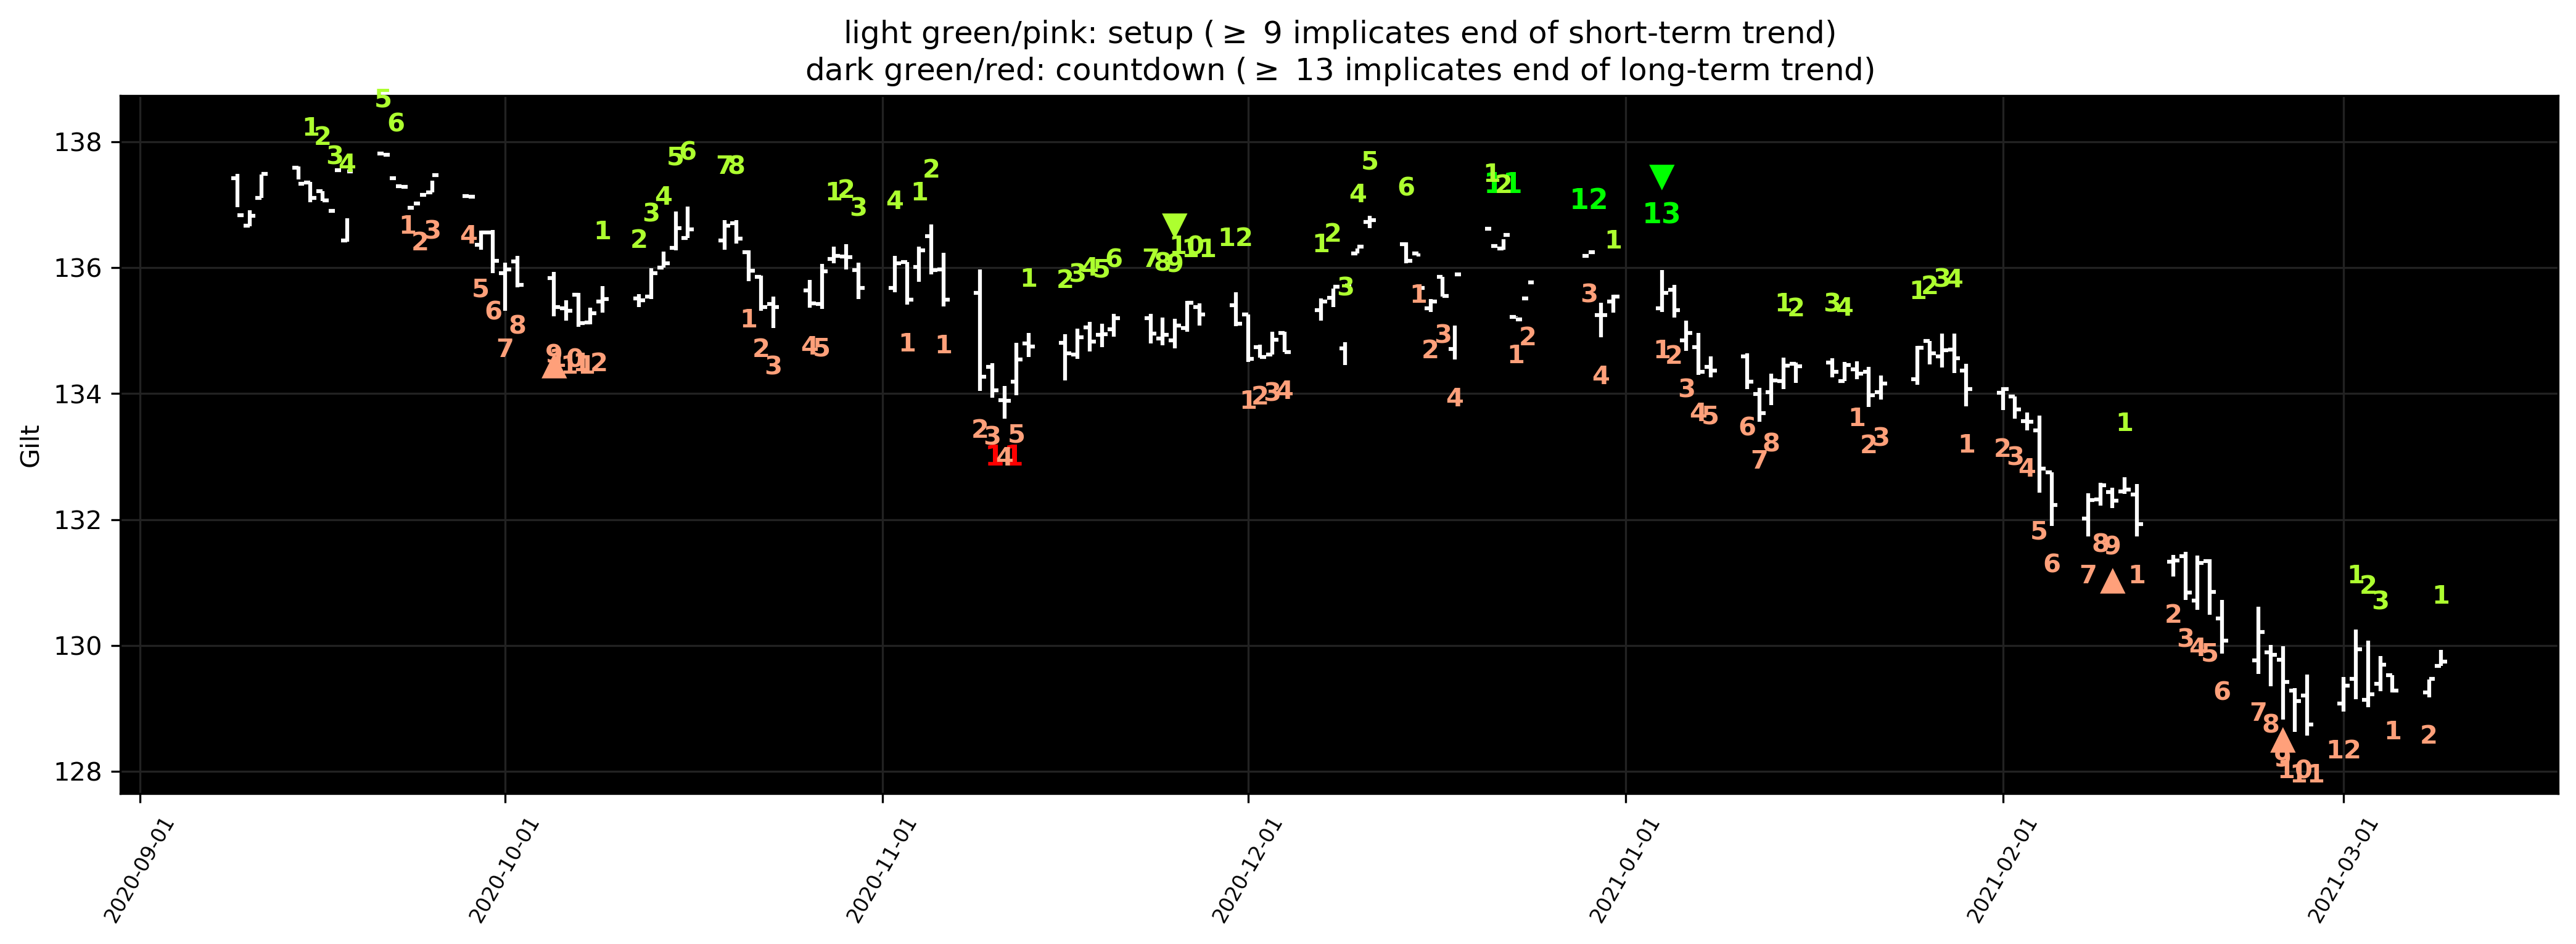

INFO : 2021-03-15 03:43:11,448 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:11,449 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:11,510 : 計算終了
INFO : 2021-03-15 03:43:11,511 : プロット中...
INFO : 2021-03-15 03:43:11,525 : 値動きプロット中...
INFO : 2021-03-15 03:43:11,833 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:11,848 : 整形中...


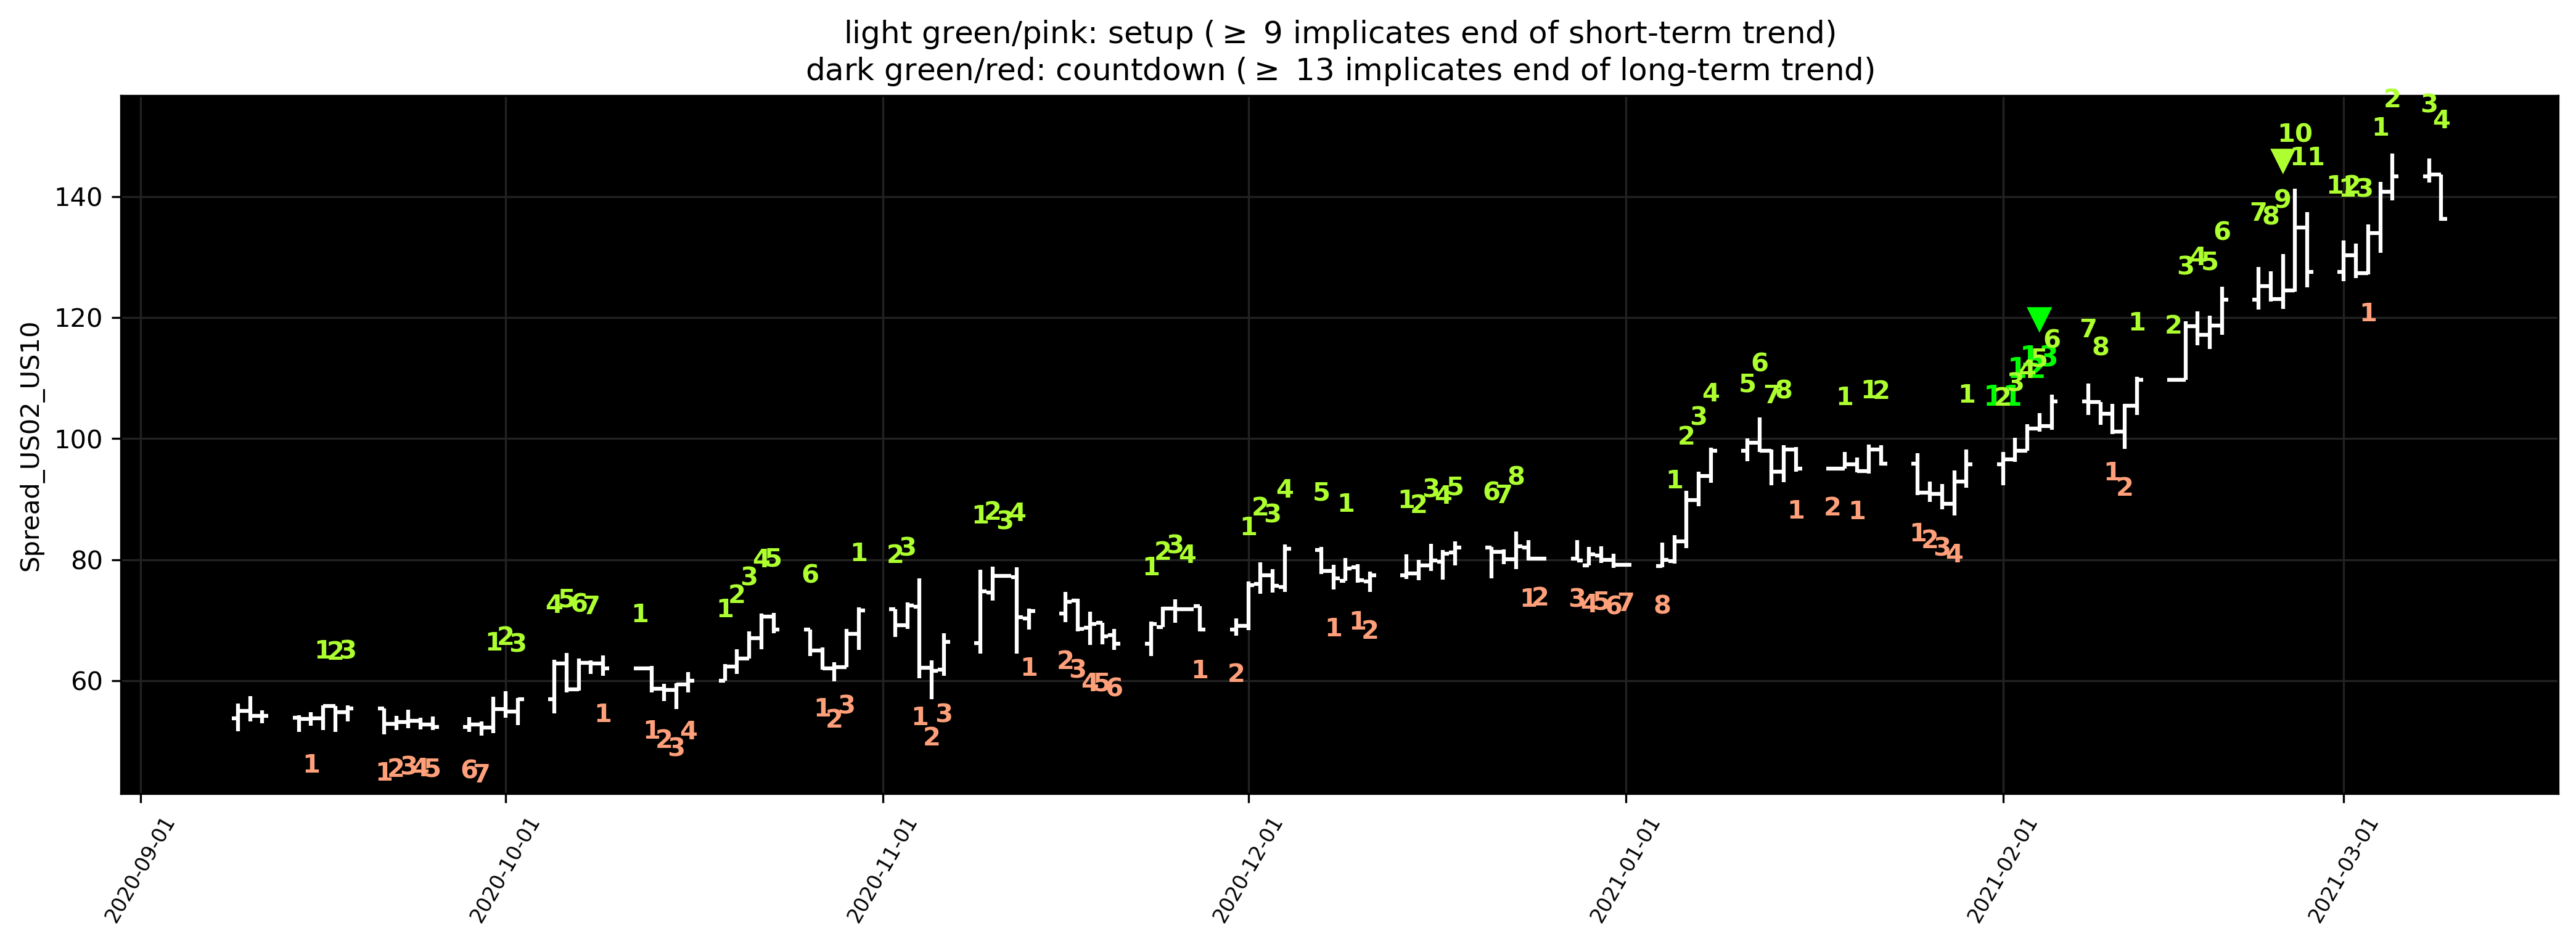

INFO : 2021-03-15 03:43:13,619 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:13,620 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:13,679 : 計算終了
INFO : 2021-03-15 03:43:13,680 : プロット中...
INFO : 2021-03-15 03:43:13,695 : 値動きプロット中...
INFO : 2021-03-15 03:43:13,998 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:14,006 : 整形中...


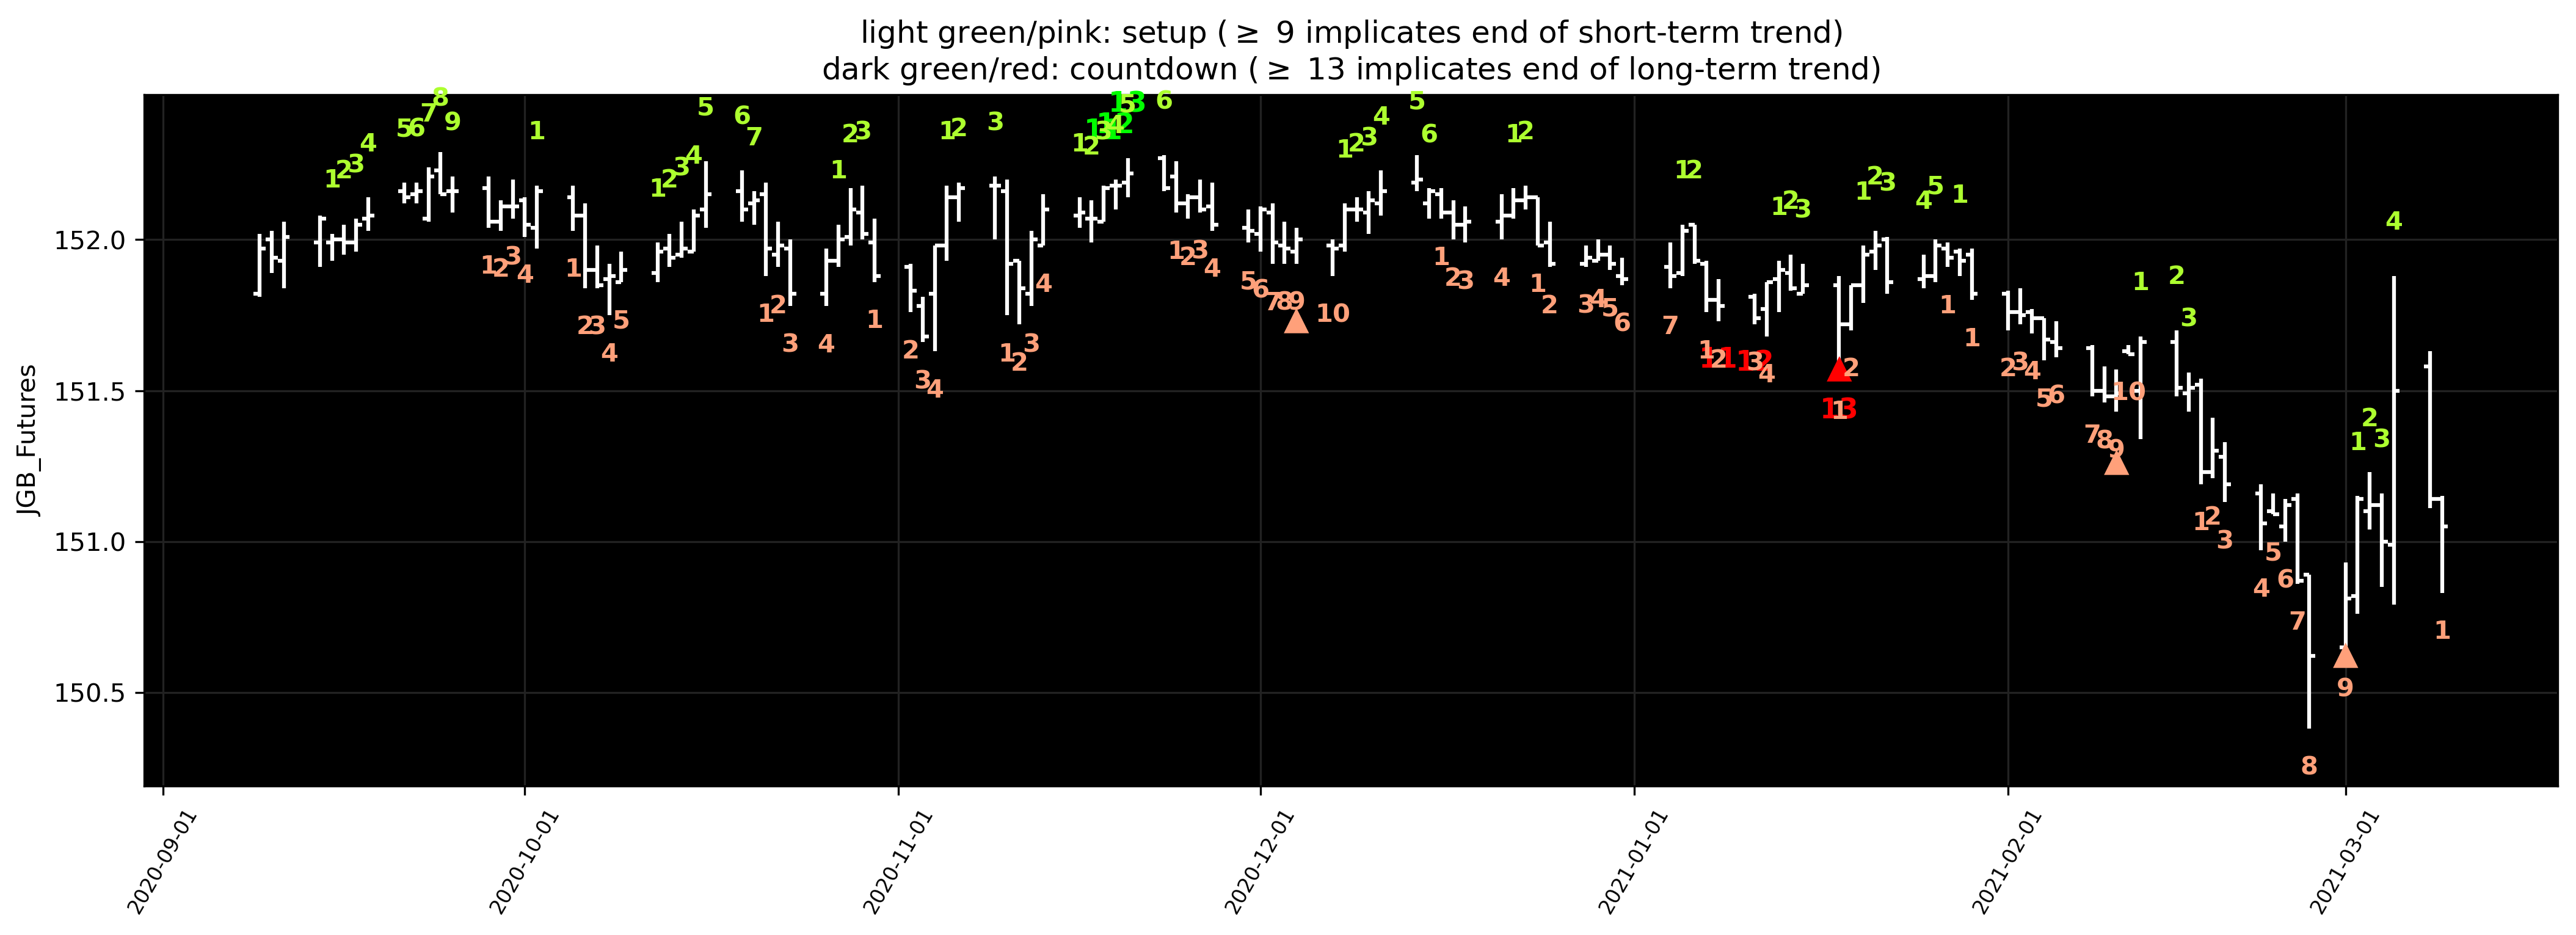

INFO : 2021-03-15 03:43:15,628 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:15,629 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:15,694 : 計算終了
INFO : 2021-03-15 03:43:15,695 : プロット中...
INFO : 2021-03-15 03:43:15,709 : 値動きプロット中...
INFO : 2021-03-15 03:43:16,125 : TDシーケンシャルプロット中...
INFO : 2021-03-15 03:43:16,134 : 整形中...


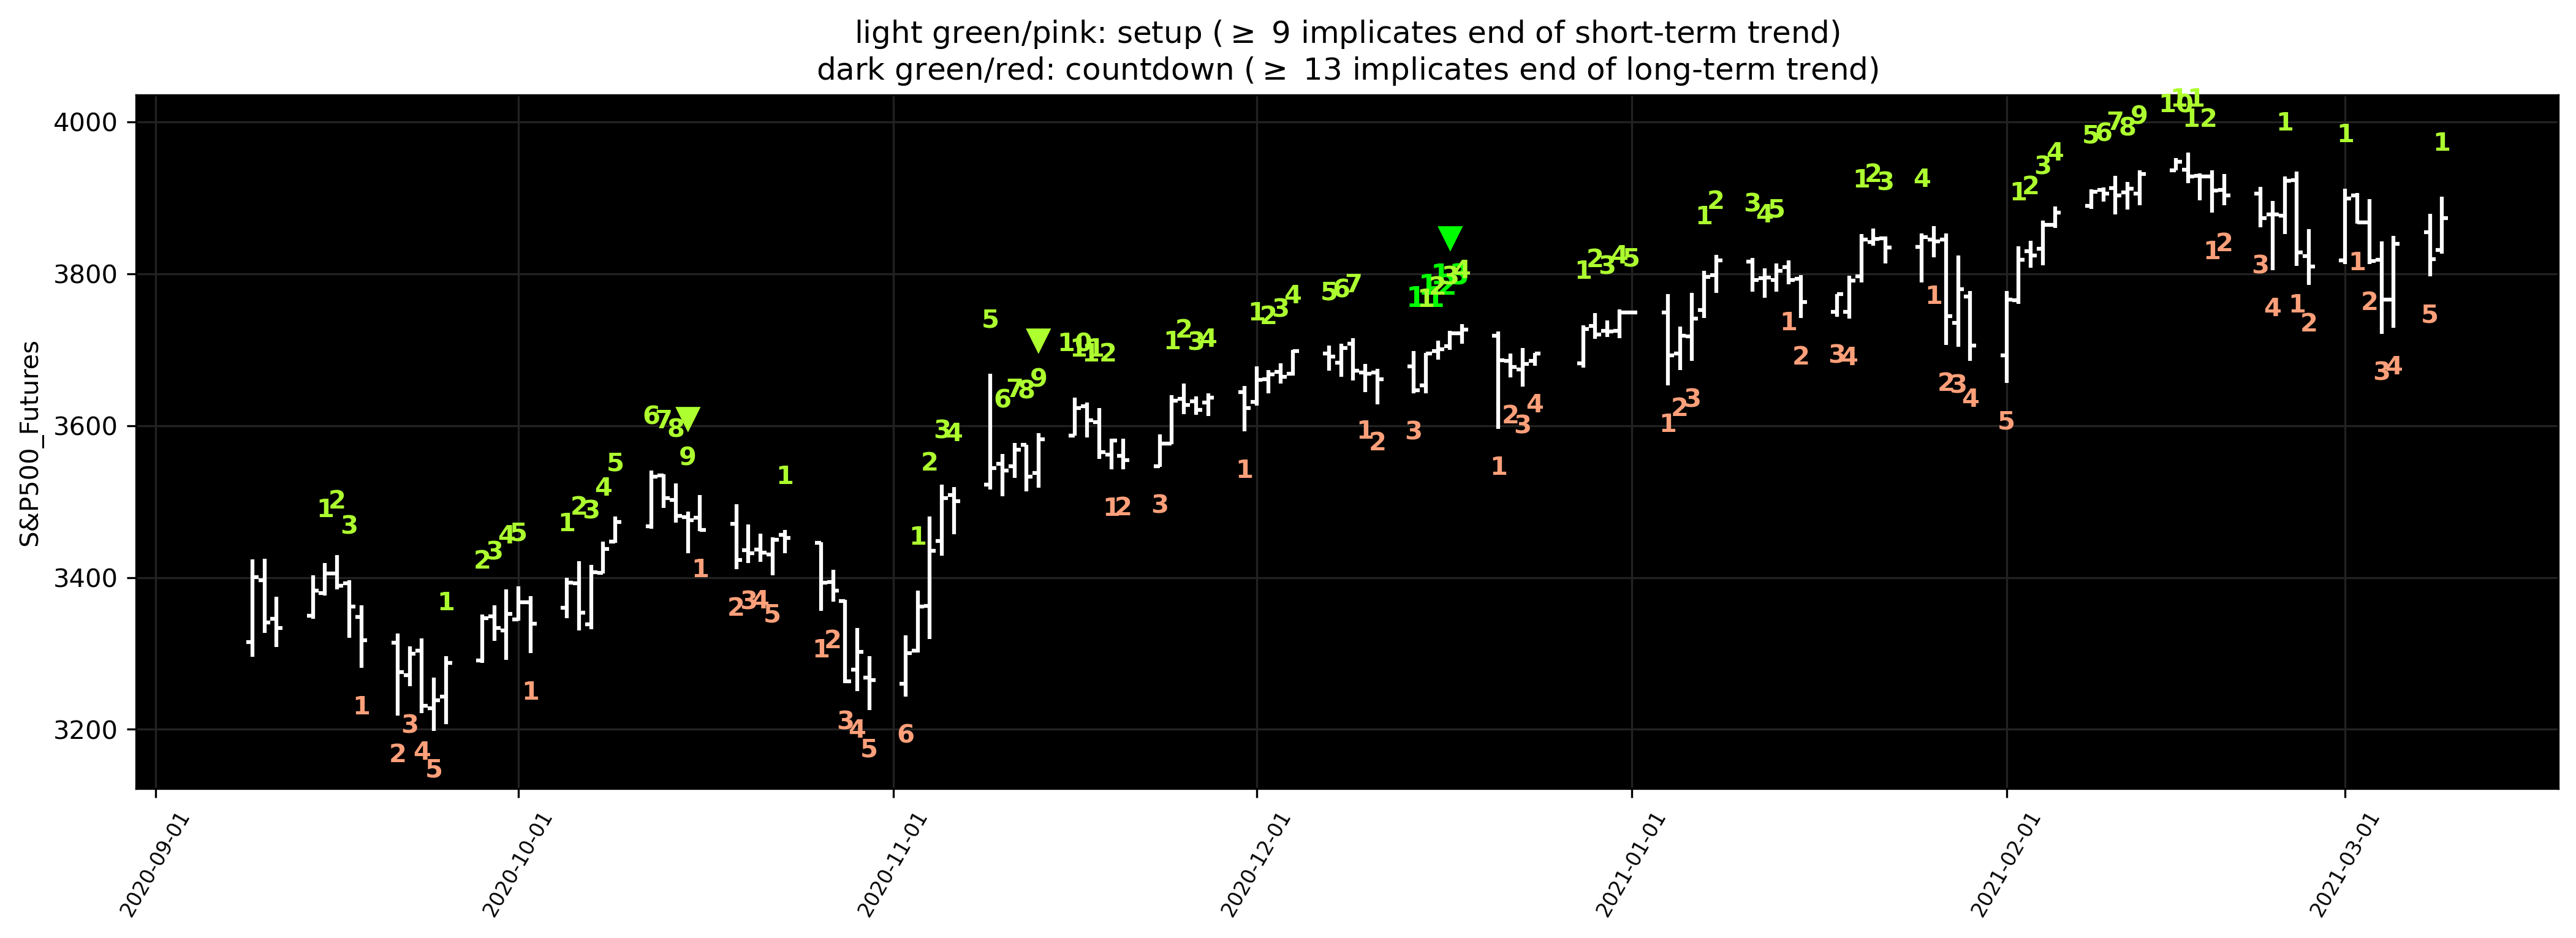

INFO : 2021-03-15 03:43:17,862 : TDシーケンシャル計算中...
INFO : 2021-03-15 03:43:17,863 : datefmtが"%Y-%m-%d"であることを確認してください
INFO : 2021-03-15 03:43:17,928 : 計算終了


In [15]:
for name, invcom_id in wanted_investingcom_ids.items():
    df = get_historical(
        id_=invcom_id,
        from_date=datetime(2020, 9, 9),
        to_date=datetime(2021, 3, 9),
        force_exclude_weekend=True,
        dateCol_be_str=True
    )
    t, o, h, l, c, shortVal, longVal, sellVal, buyVal = get_tdsequential(df)
    plot_tdseq(t, o, h, l, c, shortVal, longVal, sellVal, buyVal, 
               ylabel=name, figshow=True)